In [1]:
# إبراهيم إيهاب إبراهيم حسن 212102841
# أحمد عبد الفتاح داود بكر 212103880

In [2]:
# hello welcome back, in the second version of our project we will apply different dataset in the feild of Telecom customer 
# Churn 'WA_Fn-UseC_-Telco-Customer-Churn'it availble on website kaggle and it contains 7043 rows (customers) and 21 columns-
# (features), we will apply its needed data preprocessing and prepration for it and we will use the same applied algorthims 
# and we will add two more diffrent algorithms not applied in the orignal paper Namely, SVM and logistic regression and will
# apply to them grid search for both best performance model, and will 

In [14]:
# loading the needed librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# Loading the dataset
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<AxesSubplot:>

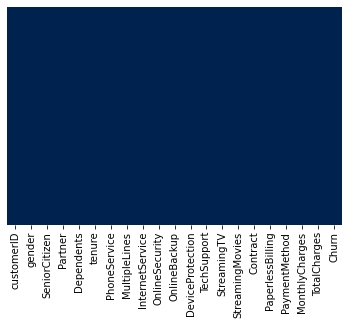

In [16]:
# ploting the dataset to show if there is null values in the features or not, blue mean non null and yellow is null
# but showing this plot mean the dataset doesn't have null values in all features
sns.heatmap(df.isnull(),yticklabels= False,cbar=False,cmap='cividis')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# after searching in the dataset we discoved that some TotalCharges values is '' white space that is why is still object 
# not float, so we have to remove this rows that contain this value in TotalCharges in order not to cause problems later 

# drop rows with with '' white space value 
df = df.drop(df[df['TotalCharges'] == ' '].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [19]:
# convert col to float values
df = df.astype({'TotalCharges':'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [20]:
# Defining binary and multi-class categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
multiclass_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                   'Contract', 'PaymentMethod']

# Binary encoding for binary columns
binary_mappings = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_mappings).astype('int8')

# Separately encode the target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype('int8')

# One-hot encoding for multi-class columns
data_encoded = pd.get_dummies(df, columns=multiclass_cols, drop_first=True)

# Display the first few rows of the updated encoded dataset
data_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df = pd.DataFrame.from_dict(data_encoded)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int8   
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int8   
 4   Dependents                             7032 non-null   int8   
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int8   
 7   PaperlessBilling                       7032 non-null   int8   
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int8   
 11  Mult

In [22]:
# we need to reindix correctlly after drop some rows that contains white spaces in values
df.reindex()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int8   
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int8   
 4   Dependents                             7032 non-null   int8   
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int8   
 7   PaperlessBilling                       7032 non-null   int8   
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int8   
 11  Mult

In [23]:
# now lets drop the columns that is not needed or that will make some problems in modeling the dataset or repetive
df = df.drop(['customerID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int8   
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int8   
 3   Dependents                             7032 non-null   int8   
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int8   
 6   PaperlessBilling                       7032 non-null   int8   
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int8   
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

In [24]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [25]:
# we need to adjust this feature because the proportions of the data are not scattered with such a large difference in values
# this can cause an issue with the performance of your models 
from sklearn.preprocessing import MinMaxScaler
original_data = df['TotalCharges']

original_data = [[value] for value in original_data]

scaler = MinMaxScaler(feature_range=(1, 100))

scaled_data = scaler.fit_transform(original_data)

scaled_values = [value[0] for value in scaled_data]
original_data = scaled_data
df['TotalCharges'] = original_data

df['TotalCharges'].describe()

count    7032.000000
mean       26.869553
std        25.895496
min         1.000000
25%         5.371377
50%        16.749922
75%        44.136143
max       100.000000
Name: TotalCharges, dtype: float64

In [28]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparing the dataset: separate features and target variable
features = df.drop('Churn', axis=1) 
target = df['Churn']

# Splitting the dataset into training and testing sets
# 20% of data is used for testing, 80% for training. Random state ensures reproducible splits
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=14)
# Initializing the KNN classifier with 179 neighbors

knn = KNeighborsClassifier(n_neighbors=13)

# Training the KNN classifier on the training data
knn.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8045486851457001

In [29]:
# Printing the confusion matrix to evaluate the performance of the classification
print(confusion_matrix(y_test, y_pred))

[[945 104]
 [171 187]]


In [30]:
# Calculate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1049
           1       0.64      0.52      0.58       358

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



In [31]:
# using Gridsearch for best performancing model
from sklearn.model_selection import GridSearchCV
numbers = list(range(1, 101))
param_grid = {'n_neighbors': numbers,
             'weights': [None, 'uniform', 'distance'],
             'algorithm': [None, 'auto', 'ball_tree', 'kd_tree', 'brute']} 
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

E:\progs\anainst\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1500 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "E:\progs\anainst\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\progs\anainst\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "E:\progs\anainst\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "E:\progs\anainst\lib\site-packages\sklearn\neighbors\_base.py

{'algorithm': 'auto', 'n_neighbors': 78, 'weights': None}

In [32]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=78, weights=None)

In [33]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[947 102]
 [180 178]]


In [34]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy

0.7995735607675906

In [35]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1049
           1       0.64      0.50      0.56       358

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [36]:
# RandomForest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparing the dataset: separate into features and target variable
features = df.drop('Churn', axis=1) 
target = df['Churn']                 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=41)

# Setting up the RandomForestClassifier with specific parameters
rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy' , min_samples_leaf = 7 , max_depth = 7)

# Training the RandomForest model on the training data
rf.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7825159914712153

In [37]:
# Printing the confusion matrix to evaluate the performance of the classification
print(confusion_matrix(y_test, y_pred))

[[928  95]
 [211 173]]


In [38]:
# Calculate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1023
           1       0.65      0.45      0.53       384

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [39]:
# using Gridsearch for best performancing model
from sklearn.model_selection import GridSearchCV
numbers = list(range(1, 101))
param_grid = {'n_estimators': numbers,
            'random_state': numbers,
            'criterion': ['gini', 'entropy'],
            'min_samples_leaf': numbers,
            'max_depth': numbers} 
grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

MemoryError: 

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
# we couldn't apply grid search for RF Due to the limited capabilities of our laptop: Intel(R) Core(TM) i7-4610M CPU @ 3.00GHz and 8.00 GB DDR3 RAM

In [ ]:
# when we use grid search in RF we always face memory lack even on high performance computer Intel(R) Core(TM) i5-11400 CPU @ 4.4 GHz and memory 16GB DDR5


In [40]:
# Decision Tree model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
features = df.drop('Churn', axis=1)  
target = df['Churn'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)

# Initialize the Decision Tree classifier with specified parameters
dt_classifier = DecisionTreeClassifier(random_state=100, criterion='gini', max_depth=7, min_samples_leaf=10)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8009950248756219


In [41]:
# Printing the confusion matrix to evaluate the performance of the classification
print(confusion_matrix(y_test, y_pred))

[[933 119]
 [161 194]]


In [42]:
# Calculate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1052
           1       0.62      0.55      0.58       355

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [43]:
#using grid search for performance model
from sklearn.model_selection import GridSearchCV
numbers = list(range(1, 31))
param_grid = {'random_state': [110],
              'max_depth' : numbers,
              'criterion' : ['gini', 'entropy'],
              'min_samples_leaf' :  numbers}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 30,
 'random_state': 110}

In [44]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=30, random_state=110)

In [45]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[957  95]
 [200 155]]


In [46]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy

0.7903340440653873

In [47]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1052
           1       0.62      0.44      0.51       355

    accuracy                           0.79      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.79      0.78      1407



In [26]:
# Gaussian Naïve Bayes model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Separate features and target variable
features = df.drop('Churn', axis=1) 
target = df['Churn'] 

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(gnb, features, target, cv=140)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Max accuracy:", cv_scores.max())

Cross-validation scores: [0.68627451 0.58823529 0.80392157 0.76470588 0.7254902  0.56862745
 0.60784314 0.58823529 0.64705882 0.64705882 0.62745098 0.74509804
 0.62745098 0.7254902  0.58823529 0.70588235 0.74509804 0.80392157
 0.70588235 0.68627451 0.64705882 0.66666667 0.7254902  0.58823529
 0.54901961 0.80392157 0.80392157 0.70588235 0.60784314 0.54901961
 0.68627451 0.68627451 0.68       0.7        0.68       0.7
 0.64       0.62       0.62       0.68       0.56       0.72
 0.62       0.82       0.7        0.66       0.72       0.58
 0.58       0.72       0.82       0.74       0.64       0.72
 0.76       0.64       0.72       0.7        0.66       0.74
 0.72       0.7        0.62       0.84       0.62       0.68
 0.64       0.74       0.52       0.48       0.72       0.54
 0.62       0.58       0.62       0.58       0.68       0.7
 0.62       0.76       0.6        0.56       0.68       0.66
 0.8        0.64       0.56       0.64       0.56       0.7
 0.54       0.72       0.54      

In [49]:
# using grid search for best performance model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'priors': [None, [0.2, 0.8], [0.5, 0.5]],
              'var_smoothing': [1e-9, 1e-8, 1e-7]} 

# Perform grid search
grid = GridSearchCV(GaussianNB(),param_grid, cv= 140)
grid.fit(X_train,y_train)
grid.best_params_

{'priors': None, 'var_smoothing': 1e-09}

In [50]:
grid.best_estimator_

GaussianNB()

In [51]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      1052
           1       0.41      0.84      0.55       355

    accuracy                           0.66      1407
   macro avg       0.66      0.72      0.64      1407
weighted avg       0.79      0.66      0.68      1407



In [52]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy

0.6560056858564322

In [53]:
# XGBoost model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Separate features and target variable
features = df.drop('Churn', axis=1)
target = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=126)

# Initialize the Decision Tree classifier with specified parameters
xgb = XGBClassifier(alpha= 0.2)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8038379530916845


In [54]:
# Printing the confusion matrix to evaluate the performance of the classification
print(confusion_matrix(y_test, y_pred))

[[947 105]
 [171 184]]


In [55]:
# Calculate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1052
           1       0.64      0.52      0.57       355

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



In [56]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'alpha' : [None, 0.1, 0.2, 0.3]}

# Perform grid search
grid = GridSearchCV(xgb, param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the best parameters and best score
grid.best_params_

{'alpha': 0.3}

In [57]:
grid.best_estimator_

XGBClassifier(alpha=0.3, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [58]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1052
           1       0.62      0.51      0.56       355

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [59]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy

0.7967306325515281

In [60]:
# Support Vector Machines (SVM)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = df.drop('Churn', axis=1)
target = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=101)
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

accuracy = accuracy_score(y_preds, y_test)
print(accuracy)

0.8052594171997157


In [61]:
print(confusion_matrix(y_preds, y_test))

[[949 171]
 [103 184]]


In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1052
           1       0.64      0.52      0.57       355

    accuracy                           0.81      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [63]:
# using Gridsearch for best performancing model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'degree': [2, 3, 4, 5],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.732 total time=   3.1s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.731 total time=   2.8s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.731 total time=   2.8s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.731 total time=   2.9s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.731 total time=   2.8s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.788 total time=45.0min


KeyboardInterrupt: 

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

In [ ]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy

In [ ]:
# we could complete the run of the grid search for svm but it took alot of time and We were pressed for time in our work, but it could be done